In [4]:
#Importing datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
import datetime
import calendar
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
conda install -c conda-forge fbprophet 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Hp\Anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         184 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         150 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    convertdate-2.1.3          |          py_1000          30 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.1            |             py_0          56 KB  conda-forge
    libpython-2.0              |           py37_0          47 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
   

In [2]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in c:\users\hp\anaconda3\lib\site-packages (4.6.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

## Read the Avocado Data

In [5]:
raw_data = pd.read_csv('E:/Springboard/Students/Erika Sam/Capstone Project 1/avocado-prices/avocado.csv')

In [6]:
raw_data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [80]:
raw_data.info()
raw_data['Date'].max()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 9537 to 17627
Data columns (total 16 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
Year            18249 non-null int64
Month           18249 non-null int64
Month_Name      18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 3.0+ MB


Timestamp('2018-11-03 00:00:00')

In [15]:
raw_data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [16]:
raw_data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [7]:
raw_data['Date']=pd.to_datetime(raw_data['Date'])
raw_data.info()
raw_data['Date'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


array(['2015-12-27T00:00:00.000000000', '2015-12-20T00:00:00.000000000',
       '2015-12-13T00:00:00.000000000', '2015-06-12T00:00:00.000000000',
       '2015-11-29T00:00:00.000000000', '2015-11-22T00:00:00.000000000',
       '2015-11-15T00:00:00.000000000', '2015-08-11T00:00:00.000000000',
       '2015-01-11T00:00:00.000000000', '2015-10-25T00:00:00.000000000',
       '2015-10-18T00:00:00.000000000', '2015-11-10T00:00:00.000000000',
       '2015-04-10T00:00:00.000000000', '2015-09-27T00:00:00.000000000',
       '2015-09-20T00:00:00.000000000', '2015-09-13T00:00:00.000000000',
       '2015-06-09T00:00:00.000000000', '2015-08-30T00:00:00.000000000',
       '2015-08-23T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2015-09-08T00:00:00.000000000', '2015-02-08T00:00:00.000000000',
       '2015-07-26T00:00:00.000000000', '2015-07-19T00:00:00.000000000',
       '2015-12-07T00:00:00.000000000', '2015-05-07T00:00:00.000000000',
       '2015-06-28T00:00:00.000000000', '2015-06-21

In [14]:
raw_data = raw_data.sort_values('Date')
raw_data['Date'].unique()

array(['2015-01-02T00:00:00.000000000', '2015-01-03T00:00:00.000000000',
       '2015-01-11T00:00:00.000000000', '2015-01-18T00:00:00.000000000',
       '2015-01-25T00:00:00.000000000', '2015-02-08T00:00:00.000000000',
       '2015-02-15T00:00:00.000000000', '2015-02-22T00:00:00.000000000',
       '2015-03-05T00:00:00.000000000', '2015-03-15T00:00:00.000000000',
       '2015-03-22T00:00:00.000000000', '2015-03-29T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2015-04-10T00:00:00.000000000',
       '2015-04-19T00:00:00.000000000', '2015-04-26T00:00:00.000000000',
       '2015-05-04T00:00:00.000000000', '2015-05-07T00:00:00.000000000',
       '2015-05-17T00:00:00.000000000', '2015-05-24T00:00:00.000000000',
       '2015-05-31T00:00:00.000000000', '2015-06-09T00:00:00.000000000',
       '2015-06-12T00:00:00.000000000', '2015-06-14T00:00:00.000000000',
       '2015-06-21T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-06T00:00:00.000000000', '2015-07-19

In [9]:
raw_data['Year']         = pd.DatetimeIndex(raw_data['Date']).year
raw_data['Month']        = pd.DatetimeIndex(raw_data['Date']).month
raw_data['Month_Name']   = raw_data['Month'].apply(lambda x: calendar.month_abbr[x])
#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [13]:
raw_data.head(10)

Date  AveragePrice  Total Volume       4046       4225       4770  \
9537  2015-01-02          1.93       3557.34     210.49    1244.18    1457.98   
723   2015-01-02          0.92     539750.77  205775.28  136119.82  127173.89   
9901  2015-01-02          1.98        769.05      52.14     620.24       0.00   
9745  2015-01-02          1.24      12276.58    6669.52    1653.73       0.00   
10941 2015-01-02          1.77       1427.11     760.33      74.32       0.00   
983   2015-01-02          0.72    1280364.01  540024.17  597855.73    8063.40   
2335  2015-01-02          0.91     469684.32  284674.20   78055.21   27248.16   
151   2015-01-02          1.06    1007418.76   93166.54  666010.38   83652.48   
411   2015-01-02          0.98     254009.70   52915.50   71209.89   80813.88   
10317 2015-01-02          1.12      50107.32   39628.65    1721.95       0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
9537       644.69      644.69        0.00         0.00       organic  2015   
723      70681.78    54003.36      688.47     15989.95  conventional  2015   
9901        96.67       96.67        0.00         0.00       organic  2015   
9745      3953.33     3953.33        0.00         0.00       organic  2015   
10941      592.46      585.38        7.08         0.00       organic  2015   
983     134420.71    86145.18    48275.53         0.00  conventional  2015   
2335     79706.75    51793.30    27913.45         0.00  conventional  2015   
151     164589.36   159916.87     4672.49         0.00  conventional  2015   
411      49070.43    33450.14    15620.29         0.00  conventional  2015   
10317     8756.72     8756.72        0.00         0.00       organic  2015   

                    region  Year  Month Month_Name  
9537             Charlotte  2015      1        Jan  
723                Detroit  2015      1        Jan  
9901           GrandRapids  2015      1        Jan  
9745         DallasFtWorth  2015      1        Jan  
10941           Pittsburgh  2015      1        Jan  
983                Houston  2015      1        Jan  
2335         SouthCarolina  2015      1        Jan  
151    BaltimoreWashington  2015      1        Jan  
411              Charlotte  2015      1        Jan  
10317           LosAngeles  2015      1        Jan

## Seeing the Trend of Average Prices

In [11]:
fig = plt.figure(figsize = (10,10))
groupBy_whole = raw_data.groupby('Date').mean()
fig = px.line(x=groupBy_whole.AveragePrice.index, y=groupBy_whole.AveragePrice)
fig.update_layout(
    title="Average Avocado Price aross year",
    xaxis_title="Date",
    yaxis_title="Average Price")
fig.show()

<Figure size 720x720 with 0 Axes>

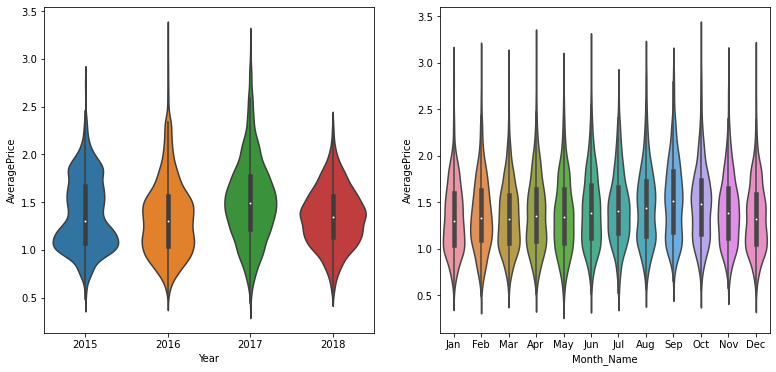

In [12]:
# Plot a violin plot of the average price vs. avocado type
fig, ax =plt.subplots(1,2,figsize=(13,6))
sns.violinplot(y='AveragePrice',x='Year',data=raw_data, ax=ax[0])
sns.violinplot(y='AveragePrice',x='Month_Name',data=raw_data, ax=ax[1])
fig.show()

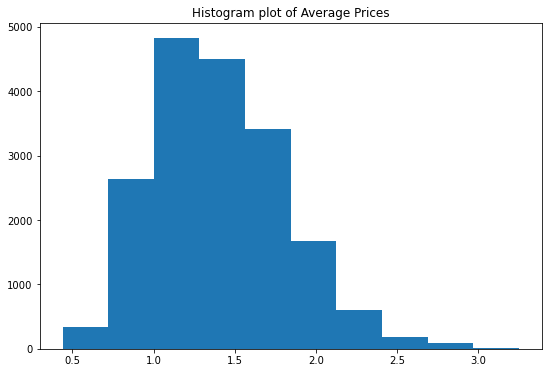

In [40]:
fig = plt.figure(figsize = (9,6))
raw_data['AveragePrice'].hist()
plt.title('Histogram plot of Average Prices')
plt.grid(b=None)

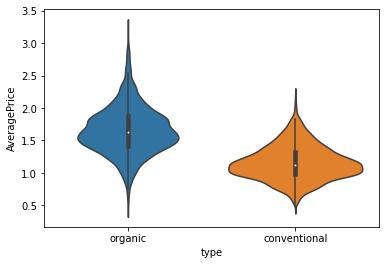

In [46]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y='AveragePrice',x='type',data=raw_data)

## Exploring further the Organic and Conventional Avocados

In [68]:
conventional = raw_data[raw_data.type=="conventional"]
organic      = raw_data[raw_data.type=="organic"]

groupBy1_price = conventional.groupby('Date').mean()
scatter1 = go.Scatter(x=groupBy1_price.AveragePrice.index, y=groupBy1_price.AveragePrice, name="Conventional")

groupBy2_price = organic.groupby('Date').mean()
scatter2 = go.Scatter(x=groupBy2_price.AveragePrice.index, y=groupBy2_price.AveragePrice, name="Organic")

data = [scatter1, scatter2]
layout=go.Layout(title="Time Series Plot for Mean Daily Price of Conventional and Organic Avocados", xaxis={'title':'Date'}, yaxis={'title':'Prices'})
figure=go.Figure(data=data,layout=layout)
iplot(figure)

## Prophet Prediction

In [72]:
data=raw_data[['Date','AveragePrice']]

In [73]:
data=data.rename(columns={'Date':'ds','AveragePrice':'y'})

In [75]:
model=Prophet()
model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
# Forcasting into the future
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)

In [77]:
forecast

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0     2015-01-02  1.418205    0.840943    1.792665     1.418205     1.418205   
1     2015-01-02  1.418205    0.832699    1.811155     1.418205     1.418205   
2     2015-01-02  1.418205    0.817385    1.819162     1.418205     1.418205   
3     2015-01-02  1.418205    0.792282    1.794809     1.418205     1.418205   
4     2015-01-02  1.418205    0.776063    1.800015     1.418205     1.418205   
5     2015-01-02  1.418205    0.800426    1.841961     1.418205     1.418205   
6     2015-01-02  1.418205    0.815551    1.811187     1.418205     1.418205   
7     2015-01-02  1.418205    0.805580    1.805224     1.418205     1.418205   
8     2015-01-02  1.418205    0.808295    1.789764     1.418205     1.418205   
9     2015-01-02  1.418205    0.803490    1.777397     1.418205     1.418205   
10    2015-01-02  1.418205    0.766068    1.764391     1.418205     1.418205   
11    2015-01-02  1.418205    0.830087    1.801550     1.418205     1.418205   
12    2015-01-02  1.418205    0.802583    1.822432     1.418205     1.418205   
13    2015-01-02  1.418205    0.816298    1.794102     1.418205     1.418205   
14    2015-01-02  1.418205    0.818414    1.779449     1.418205     1.418205   
15    2015-01-02  1.418205    0.808670    1.750182     1.418205     1.418205   
16    2015-01-02  1.418205    0.789141    1.792342     1.418205     1.418205   
17    2015-01-02  1.418205    0.805789    1.806799     1.418205     1.418205   
18    2015-01-02  1.418205    0.833887    1.803844     1.418205     1.418205   
19    2015-01-02  1.418205    0.847016    1.781044     1.418205     1.418205   
20    2015-01-02  1.418205    0.806679    1.822834     1.418205     1.418205   
21    2015-01-02  1.418205    0.794695    1.805365     1.418205     1.418205   
22    2015-01-02  1.418205    0.839815    1.822486     1.418205     1.418205   
23    2015-01-02  1.418205    0.859938    1.793719     1.418205     1.418205   
24    2015-01-02  1.418205    0.805481    1.811388     1.418205     1.418205   
25    2015-01-02  1.418205    0.815423    1.801384     1.418205     1.418205   
26    2015-01-02  1.418205    0.827431    1.789141     1.418205     1.418205   
27    2015-01-02  1.418205    0.852296    1.795120     1.418205     1.418205   
28    2015-01-02  1.418205    0.834097    1.851376     1.418205     1.418205   
29    2015-01-02  1.418205    0.831469    1.809259     1.418205     1.418205   
...          ...       ...         ...         ...          ...          ...   
18584 2019-10-05  0.974648    0.459410    1.472104     0.898983     1.044519   
18585 2019-10-06  0.973916    0.506900    1.534207     0.897893     1.043925   
18586 2019-10-07  0.973183    0.524831    1.510847     0.896839     1.043546   
18587 2019-10-08  0.972450    0.435878    1.481116     0.895705     1.043075   
18588 2019-10-09  0.971718    0.466049    1.441101     0.894582     1.042914   
18589 2019-10-10  0.970985    0.603567    1.604239     0.893480     1.042753   
18590 2019-10-11  0.970253    0.449944    1.421359     0.892377     1.042592   
18591 2019-10-12  0.969520    0.465164    1.461017     0.891176     1.042291   
18592 2019-10-13  0.968787    0.540299    1.550743     0.890155     1.041835   
18593 2019-10-14  0.968055    0.486323    1.537636     0.889070     1.041343   
18594 2019-10-15  0.967322    0.476258    1.472986     0.888027     1.040964   
18595 2019-10-16  0.966590    0.469284    1.509583     0.887160     1.040449   
18596 2019-10-17  0.965857    0.624918    1.632131     0.885984     1.039912   
18597 2019-10-18  0.965125    0.478579    1.475991     0.884824     1.039374   
18598 2019-10-19  0.964392    0.507066    1.501980     0.883922     1.038836   
18599 2019-10-20  0.963659    0.601570    1.572612     0.882957     1.038298   
18600 2019-10-21  0.962927    0.541199    1.611394     0.881956     1.037760   
18601 2019-10-22  0.962194    0.547593    1.566002     0.880954     1.037221   
18602 2019-10-

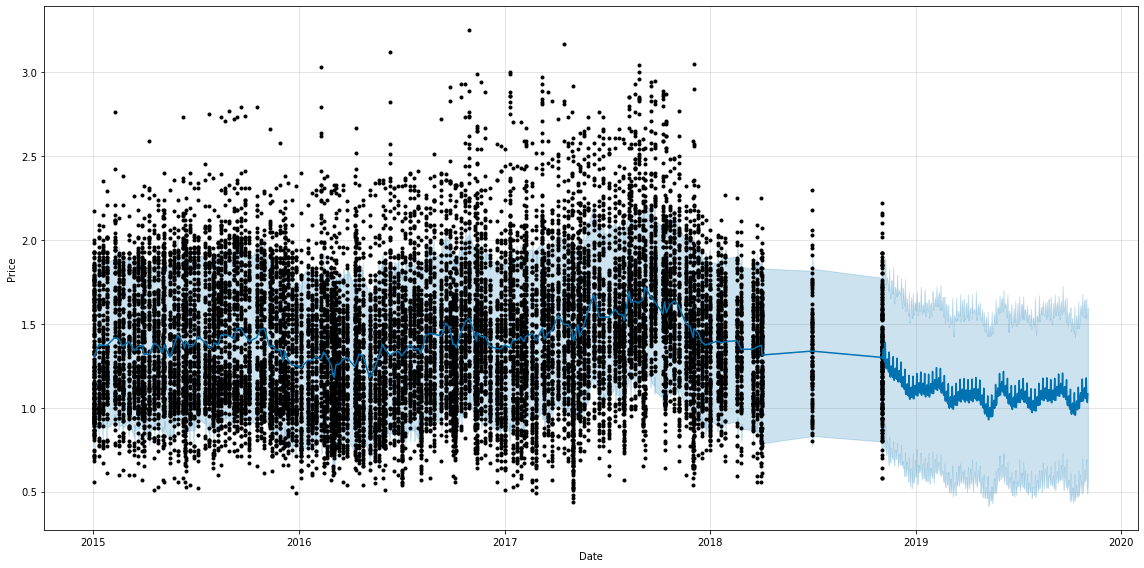

In [78]:
fig=model.plot(forecast,xlabel='Date',ylabel='Price',figsize=(16,8))

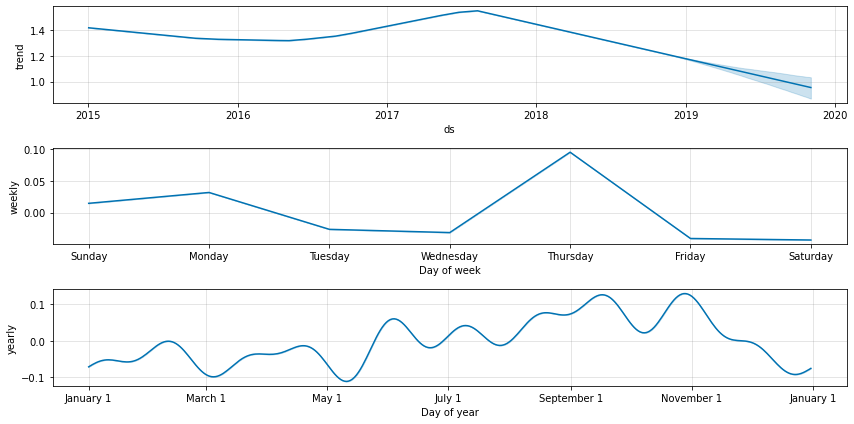

In [82]:
fig=model.plot_components(forecast,figsize=(12,6))